<a href="https://colab.research.google.com/github/kgazaleh/thwnd_2000-IDS/blob/main/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convert the entire Linear Regression Python notebook to R and redo all the data analysis steps (in R): https://github.com/bforoura/IDS/blob/main/linear_regression_Python.ipynb (Links to an external site.).

# **Supervised Learning: Linear Regression**

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R

library(readr)
companyDF <- read_csv('https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv', show_col_types = FALSE)
companyDF

# A tibble: 200 × 4
      TV Radio Newspaper Sales
   <dbl> <dbl>     <dbl> <dbl>
 1 230.   37.8      69.2  22.1
 2  44.5  39.3      45.1  10.4
 3  17.2  45.9      69.3  12  
 4 152.   41.3      58.5  16.5
 5 181.   10.8      58.4  17.9
 6   8.7  48.9      75     7.2
 7  57.5  32.8      23.5  11.8
 8 120.   19.6      11.6  13.2
 9   8.6   2.1       1     4.8
10 200.    2.6      21.2  15.6
# … with 190 more rows


In [ ]:
#Display first ten rows
%%R

head(companyDF, 10)

# A tibble: 10 × 4
      TV Radio Newspaper Sales
   <dbl> <dbl>     <dbl> <dbl>
 1 230.   37.8      69.2  22.1
 2  44.5  39.3      45.1  10.4
 3  17.2  45.9      69.3  12  
 4 152.   41.3      58.5  16.5
 5 181.   10.8      58.4  17.9
 6   8.7  48.9      75     7.2
 7  57.5  32.8      23.5  11.8
 8 120.   19.6      11.6  13.2
 9   8.6   2.1       1     4.8
10 200.    2.6      21.2  15.6


In [ ]:
#Summarize
%%R

summary(companyDF)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  


## **Examine Correlations**



In [ ]:
#Python:# Let’s compute the standard correlation coefficient (Pearson’s r) between pairs of attributes
# to determine which parameter has the greatest correlation with Sales
%%R
CompanyDF <- read.csv("https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv")
corr_matrix = cor(CompanyDF, method = "pearson")
corr_matrix

                  TV      Radio  Newspaper     Sales
TV        1.00000000 0.05480866 0.05664787 0.9012079
Radio     0.05480866 1.00000000 0.35410375 0.3496311
Newspaper 0.05664787 0.35410375 1.00000000 0.1579600
Sales     0.90120791 0.34963110 0.15796003 1.0000000


## **Examine Features with Boxplots**

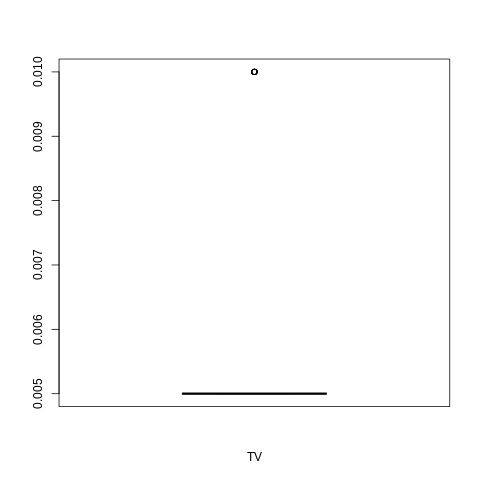

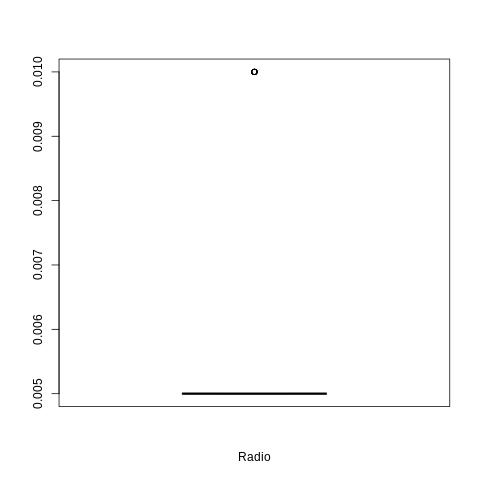

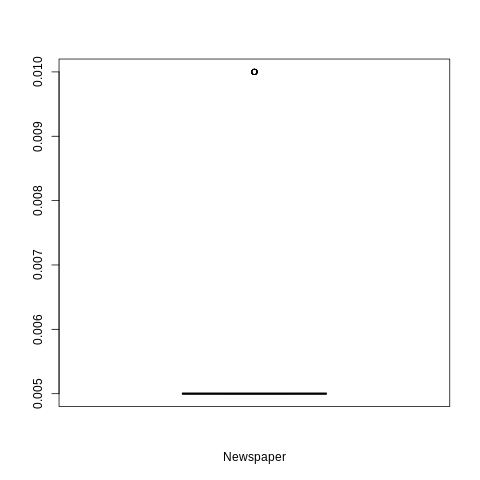

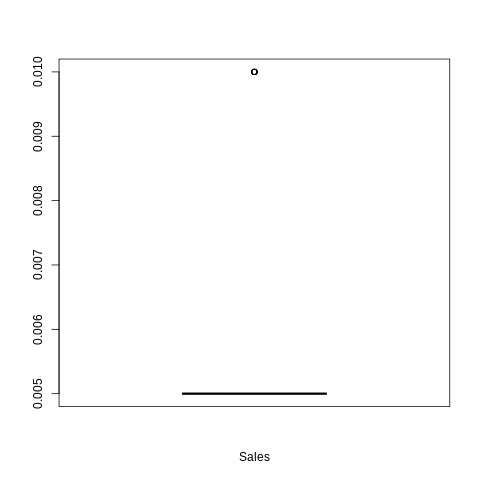

In [ ]:
%%R
for(col in 1:length(companyDF))
  {boxplot(prop.table(table(companyDF[,1])),
           col="yellow", 
           xlab=names(companyDF[col]))
  }
  

## **Examine Feature Distributions**



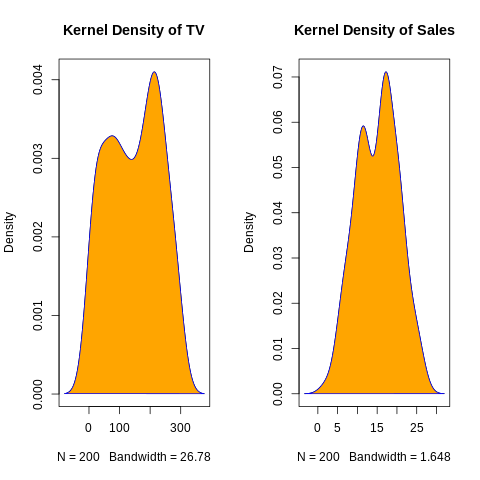

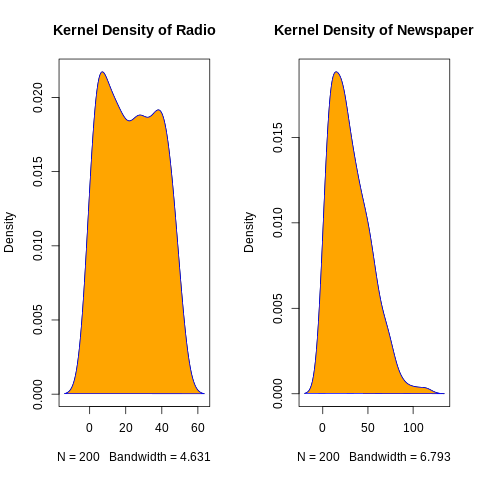

In [ ]:
# plotting histogram and  kernel density estimates 
%%R
par(mfrow=c(1, 2))

# Kernel Density Plot for TV
d1 <- density(companyDF$TV) 

# plots the results
plot(d1, main="Kernel Density of TV") 

# plots the results (filled)
polygon(d1, col="orange", border="blue")

# Kernel Density Plot for Sales
d2 <- density(companyDF$Sales) 

# plots the results
plot(d2, main="Kernel Density of Sales") 

# plots the results (filled)
polygon(d2, col="orange", border="blue") 

# Kernel Density Plot for Radio
d3 <- density(companyDF$Radio) 

# plots the results
plot(d3, main="Kernel Density of Radio") 

# plots the results (filled)
polygon(d3, col="orange", border="blue") 

# Kernel Density Plot for Newspaper
d4 <- density(companyDF$Newspaper) 

# plots the results
plot(d4, main="Kernel Density of Newspaper") 

# plots the results (filled)
polygon(d4, col="orange", border="blue") 


## **Check for Missing Values**

* Determine if there are any missing values
* If so, decide on the method of imputation, e.g., mean, median, most_frequent



In [ ]:
%%R
sum(is.na(companyDF))


[1] 0


## **Bulid the Linear Regression Model**

* y = f(x), where

> y (dependent parameter) = Sales

> x (independent parameter) = TV, Radio, or NewsPaper






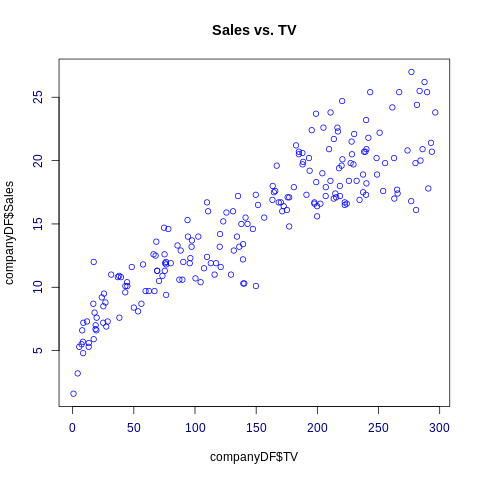

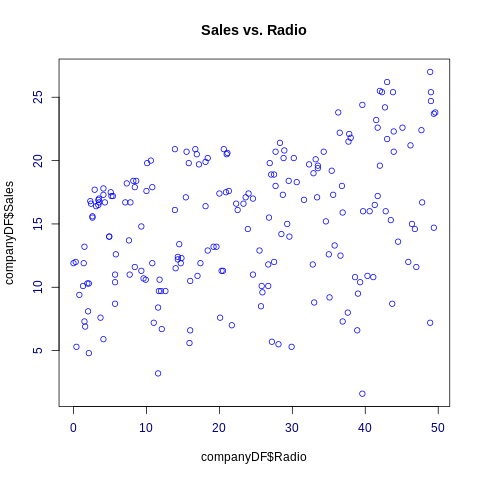

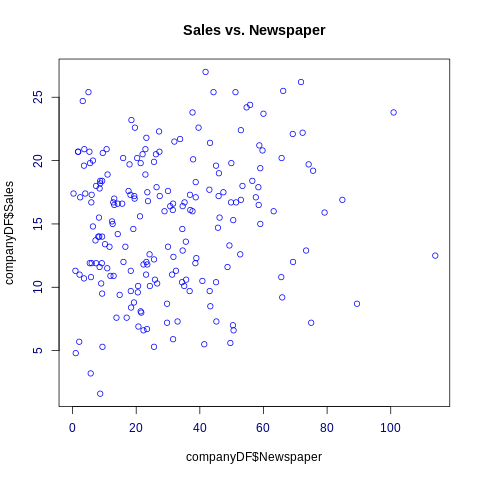

In [ ]:
# Here the target variable is the Sales column
%%R
#make scatter plot with x = TV
plot(y = companyDF$Sales, x = companyDF$TV,
   col = "blue",
   col.axis = "navy",
   main = "Sales vs. TV")

#make scatter plot with x = Radio
plot(y = companyDF$Sales, x = companyDF$Radio,
   col = "blue",
   col.axis = "navy",
   main = "Sales vs. Radio")

#make scatter plot with x = Newspaper
plot(y = companyDF$Sales, x = companyDF$Newspaper,
   col = "blue",
   col.axis = "navy",
   main = "Sales vs. Newspaper")

## **Use the Entire Data Set for Training**

In [ ]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values

%%R
x=companyDF$Sales
y=companyDF$TV
lm1 <- lm(x ~ y, data = companyDF,)
lm1


Call:
lm(formula = x ~ y, data = companyDF)

Coefficients:
(Intercept)            y  
    6.97482      0.05546  



In [ ]:
%%R
#  R2 score and MSE
cat('R2 squared: ',summary(lm1)$r.squared)
cat('\n')
cat('MSE: ',mean(lm1$residuals^2))

R2 squared:  0.8121757
MSE:  5.217744

### **Linear Model**:   Sales = 6.97 + 0.05 * TV

## **Split the Data into Training and Test Cases**

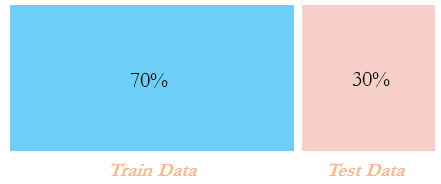

In [ ]:
%%R
#R: train and test splitting
dt = sort(sample(nrow(companyDF), nrow(companyDF)*.7))
train <- companyDF[dt,]
test <- companyDF[-dt,]
dt

  [1]   2   3   4   5   7   8  10  11  13  16  17  19  20  21  22  23  25  26
 [19]  27  28  29  30  34  35  37  38  39  40  43  44  45  47  49  50  51  54
 [37]  55  56  60  61  62  63  64  65  66  68  69  70  71  72  73  75  76  77
 [55]  81  82  83  84  85  87  88  89  90  91  92  93  94  95  96  97  98  99
 [73] 101 103 104 106 107 110 111 113 115 116 117 120 121 122 123 125 126 128
 [91] 129 130 133 135 137 139 143 145 146 147 148 149 150 151 153 154 155 157
[109] 158 162 163 164 165 166 167 168 169 170 171 172 175 176 177 178 179 183
[127] 184 185 187 188 189 190 191 192 193 194 195 196 198 199


In [ ]:
# 70% of 200 cases are used for training now
%%R
nrow(train)

[1] 140


In [ ]:
# 30% of 200 cases are set aside for testing
%%R
nrow(test)

[1] 60


In [ ]:
#Create the model
%%R
lmModel <- lm(Sales~TV + Radio + Newspaper, data = train)
lmModel


Call:
lm(formula = Sales ~ TV + Radio + Newspaper, data = train)

Coefficients:
(Intercept)           TV        Radio    Newspaper  
   4.703496     0.052206     0.117762     0.001458  



In [ ]:
%%R

cat('R2 squared: ',summary(lmModel)$r.squared)
cat('\n')
cat('MSE: ',mean(lmModel$residuals^2))



R2 squared:  0.9136607
MSE:  2.184868

Recall the dataset contains amounts spent on different types of advertisements and the resulting Sales. Build the following linear models and plot the obtained MSE and R2 values for each model
a. Sales vs. TV
b. Sales vs. (TV, Radio, Newspaper)

In [ ]:
#Build linear model for Sales vs. TV
%%R
lmModel1 <- lm(Sales~TV, data = train)
lmModel1



Call:
lm(formula = Sales ~ TV, data = train)

Coefficients:
(Intercept)           TV  
    7.45019      0.05257  



In [ ]:
#MSE and R2 for Sales vs. TV
%%R
#  R2 score and MSE
cat('R2 squared: ',summary(lmModel1)$r.squared)
cat('\n')
cat('MSE: ',mean(lmModel1$residuals^2))

R2 squared:  0.7924982
MSE:  5.250957

In [ ]:
#R2 and MSE for Sales vs. (TV, Radio, Newspaper)
%%R
cat('R2 squared: ',summary(lmModel)$r.squared)
cat('\n')
cat('MSE: ',mean(lmModel$residuals^2))

R2 squared:  0.9136607
MSE:  2.184868

## **Summary**

* Model trained and tested on the entire data set of 200 cases: 
> **Sales = 6.97 + 0.06 * TV**    

* Model trained on 70% of the data and tested on 30% of the data: 
> **Sales = 6.90 + 0.06 * TV**





